## Heroe performance 

In [1]:
import numpy as np 
import pandas as pd 
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
jugadores=pd.read_csv("players.csv")
jugadores.head()

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
jugadores_performance=jugadores[['hero_id', 'gold',
       'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'hero_damage',
       'hero_healing', 'tower_damage', 'level', 'leaver_status']]

jugadores_performance.head()

,hero_id,gold,gold_per_min,xp_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage,level,leaver_status
0,86,3261,347,362,9,3,18,8690,218,143,16,0
1,51,2954,494,659,13,3,18,23747,0,423,22,0
2,83,110,350,385,0,4,15,4217,1595,399,17,0
3,11,1179,599,605,8,4,19,14832,2714,6055,21,0
4,67,3307,613,762,20,3,17,33740,243,1833,24,0


In [28]:
heroes = pd.read_csv('hero_names.csv')
heroes.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [38]:
heroes_resumen=dict(zip(heroes['hero_id'],heroes['localized_name']))
heroes_resumen[0] = 'unknown'
jugadores_performance['heroe'] = jugadores_performance['hero_id'].apply(lambda _id : heroes_resumen[_id])


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
jugadores_performance.head()


,hero_id,gold,gold_per_min,xp_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage,level,leaver_status,heroe
0,86,3261,347,362,9,3,18,8690,218,143,16,0,Rubick
1,51,2954,494,659,13,3,18,23747,0,423,22,0,Clockwerk
2,83,110,350,385,0,4,15,4217,1595,399,17,0,Treant Protector
3,11,1179,599,605,8,4,19,14832,2714,6055,21,0,Shadow Fiend
4,67,3307,613,762,20,3,17,33740,243,1833,24,0,Spectre


In [41]:
heroes_estadisticas = jugadores_performance.groupby(['heroe']).mean()
heroes_estadisticas.drop('unknown',inplace=True)
print(heroes_estadisticas)



                    hero_id         gold  gold_per_min  xp_per_min      kills  \
heroe                                                                           
Abaddon               102.0  1856.153474    363.055287  417.260725   5.005740   
Alchemist              73.0  2769.521633    709.545455  577.001832   6.679019   
Ancient Apparition     68.0  1662.564934    313.147046  324.378054   4.826151   
Anti-Mage               1.0  2392.246275    554.192742  580.392827   7.340996   
Axe                     2.0  1682.507933    400.109107  442.938274   8.525321   
Bane                    3.0  1512.149628    295.293380  336.720329   4.766941   
Batrider               65.0  1614.173624    362.856736  418.428843   6.055977   
Beastmaster            38.0  1757.401269    384.134814  426.685170   5.455987   
Bloodseeker             4.0  1821.146143    447.641746  494.835927   9.657307   
Bounty Hunter          62.0  2004.498160    412.049610  367.763727   6.731047   
Brewmaster             78.0 

In [43]:
Cluster_heroes=heroes_estadisticas[['gold_per_min','kills','deaths','assists','hero_damage','hero_healing','tower_damage']]

Cluster_heroes.head()

,gold_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage
heroe,,,,,,,
Abaddon,363.055287,5.005740,6.278550,12.647432,9660.720846,2242.337462,1009.606949
Alchemist,709.545455,6.679019,7.173369,11.647562,14438.700906,10.312735,2585.172758
Ancient Apparition,313.147046,4.826151,7.492818,13.356286,8888.788094,213.265956,298.453280
Anti-Mage,554.192742,7.340996,5.449979,6.722222,10162.878033,135.156769,3081.401767
Axe,400.109107,8.525321,9.365138,10.498153,11945.333188,14.217779,453.616605


In [47]:
from sklearn.cluster import KMeans
n_clusters = 6

heroes_kmeans_entrenamiento = KMeans(n_clusters=n_clusters,random_state=1000).fit(Cluster_heroes)

In [49]:
Cluster_heroes['kmeans'] = heroes_kmeans_entrenamiento.labels_

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
kmeans_estadisticas = Cluster_heroes.groupby(['kmeans']).mean()
kmeans_estadisticas['count'] = Cluster_heroes.groupby(['kmeans'])['kills'].count()
kmeans_estadisticas.head()

,gold_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage,count
kmeans,,,,,,,,
0,434.115688,8.173118,7.883335,10.619670,13045.482029,274.100182,1691.149193,25
1,333.412530,4.581152,8.189627,13.109737,8360.237928,475.675404,594.293178,20
2,398.323580,6.479278,7.525515,11.700566,10838.428223,504.399714,1273.539193,33
3,431.215415,10.267620,7.424806,14.864875,22791.040246,98.771713,303.982615,2
4,462.363888,9.316526,7.585891,11.607321,15565.095385,131.819645,1761.947623,24


In [53]:
#Normalización

kmeans_statmeans = kmeans_estadisticas.mean(axis=0)
kmeans_range = kmeans_estadisticas.max(axis=0) - kmeans_estadisticas.min(axis=0)
kmeans_statnorm = (kmeans_estadisticas - kmeans_statmeans) / kmeans_range
kmeans_statnorm = kmeans_statnorm



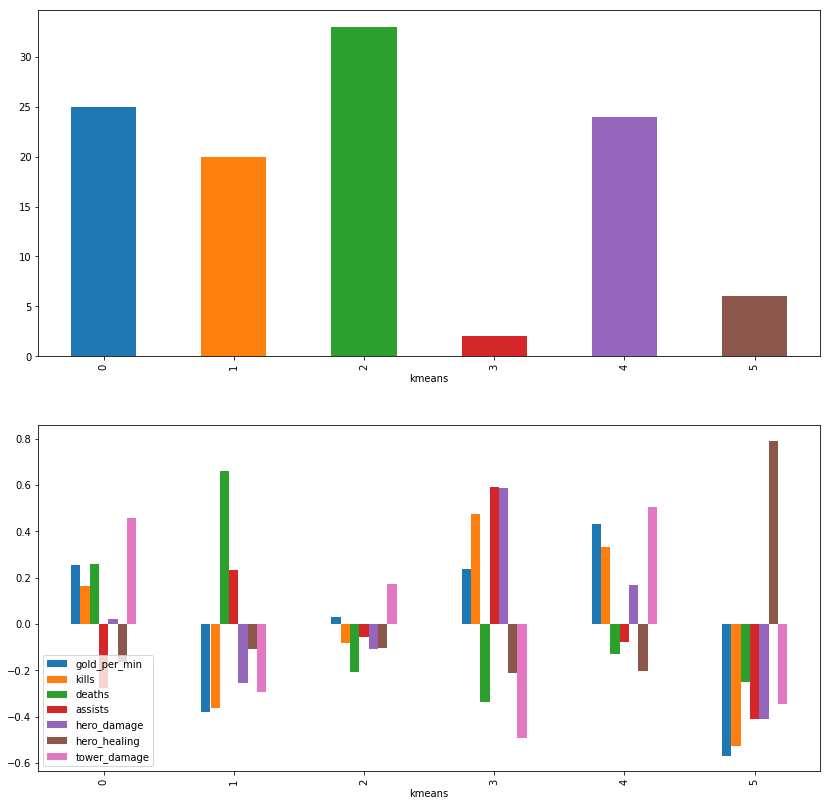

In [54]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(14,14))
kmeans_estadisticas['count'].plot.bar(ax=axis1)
kmeans_statnorm.iloc[:,:7].plot.bar(ax=axis2).legend(loc='lower left')

In [56]:
Cluster_heroes['heroclass'] = 'na'
Cluster_heroes.loc[(Cluster_heroes['kmeans']==4),'heroclass8'] = 'Fighter / Charger'
Cluster_heroes.loc[(Cluster_heroes['kmeans']==1),'heroclass8'] = 'Tank / Support'
Cluster_heroes.loc[(Cluster_heroes['kmeans']==0),'heroclass8'] = 'Laner Solo / Squishy'
Cluster_heroes.loc[(Cluster_heroes['kmeans']==5),'heroclass8'] = 'Healer'
Cluster_heroes.loc[(Cluster_heroes['kmeans']==3),'heroclass8'] = 'Assassin / OP'
Cluster_heroes.loc[(Cluster_heroes['kmeans']==2),'heroclass8'] = 'Average'

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [57]:
Cluster_ordenado = Cluster_heroes[['heroclass8','gold_per_min','kills','deaths','assists','hero_damage','hero_healing','tower_damage']].sort_values(['heroclass8'])
Cluster_ordenado.to_csv('heroCluster.csv',index=True)
Cluster_ordenado

,heroclass8,gold_per_min,kills,deaths,assists,hero_damage,hero_healing,tower_damage
heroe,,,,,,,,
Zeus,Assassin / OP,406.194814,10.025278,7.576814,18.238178,23793.737198,130.565265,413.339943
Tinker,Assassin / OP,456.236015,10.509962,7.272797,11.491571,21788.343295,66.978161,194.625287
Earth Spirit,Average,332.400997,5.356838,7.667023,15.289530,10249.472222,731.684117,333.606125
Earthshaker,Average,334.294887,4.931202,8.514616,15.178221,10366.782302,18.692308,407.941093
Elder Titan,Average,333.443914,4.274463,7.916468,15.890215,10567.324582,260.590692,515.041766
Enchantress,Average,378.386811,7.106299,6.854331,8.553150,10737.148622,1253.795276,919.927165
Faceless Void,Average,461.533354,8.223301,7.211087,8.652365,10869.204823,2.836204,1548.680864
Lich,Average,318.566247,5.601878,7.397482,12.551312,11277.307446,789.649669,413.705355
Lifestealer,Average,459.798066,7.417021,6.620116,9.713733,11640.540426,818.457640,1641.987621
